# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Gaussian-and-Gaussian-Like" data-toc-modified-id="Gaussian-and-Gaussian-Like-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gaussian and Gaussian-Like</a></div><div class="lev1 toc-item"><a href="#Get-large-sample-to-get-gaussian-looking-histogram" data-toc-modified-id="Get-large-sample-to-get-gaussian-looking-histogram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get large sample to get gaussian looking histogram</a></div><div class="lev1 toc-item"><a href="#Data-Resolution" data-toc-modified-id="Data-Resolution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Resolution</a></div><div class="lev1 toc-item"><a href="#Extreme-Values" data-toc-modified-id="Extreme-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extreme Values</a></div><div class="lev1 toc-item"><a href="#Long-Tails" data-toc-modified-id="Long-Tails-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Long Tails</a></div><div class="lev1 toc-item"><a href="#Power-Transforms" data-toc-modified-id="Power-Transforms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Power Transforms</a></div><div class="lev1 toc-item"><a href="#Use-Anyway" data-toc-modified-id="Use-Anyway-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Use Anyway</a></div><div class="lev1 toc-item"><a href="#Extensions" data-toc-modified-id="Extensions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extensions</a></div><div class="lev1 toc-item"><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import scipy
import scipy.stats as stats

%load_ext version_information
%version_information numpy,  scipy, pandas, sklearn, matplotlib, seaborn

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 7.4.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.11.0
scipy 0.19.0
pandas 0.20.0
sklearn 0.18.1
matplotlib 2.0.0
seaborn 0.7.1
Thu Jun 27 13:43:49 2019 EDT

https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/

# Gaussian and Gaussian-Like
There may be occasions when you are working with a non-Gaussian distribution, but wish to use parametric statistical methods instead of nonparametric methods.

For example, you may have a data sample that has the familiar bell-shape, meaning that it looks Gaussian, but it fails one or more statistical normality tests. This suggests that the data may be Gaussian-like. You would prefer to use parametric statistics in this situation given that better statistical power and because the data is clearly Gaussian, or could be, after the right data transform.

There are many reasons why the dataset may not be technically Gaussian. In this post, we will look at some simple techniques that you may be able to use to transform a data sample with a Gaussian-like distribution into a Gaussian distribution.

There is no silver bullet for this process; some experimentation and judgment may be required.

# Get large sample to get gaussian looking histogram
One common reason that a data sample is non-Gaussian is because the size of the data sample is too small.

Many statistical methods were developed where data was scarce. Hence, the minimum. number of samples for many methods may be as low as 20 or 30 observations.

Nevertheless, given the noise in your data, you may not see the familiar bell-shape or fail normality tests with a modest number of samples, such as 50 or 100. If this is the case, perhaps you can collect more data. Thanks to the law of large numbers, the more data that you collect, the more likely your data will be able to used to describe the underlying population distribution.

To make this concrete, below is an example of a plot of a small sample of 50 observations drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 50.

98.7242575996 48.4794641479


(array([  2.,   0.,   4.,  12.,   9.,   7.,   5.,   5.,   3.,   3.]),
 array([ -15.07693484,    6.93203432,   28.94100349,   50.94997266,
          72.95894182,   94.96791099,  116.97688016,  138.98584932,
         160.99481849,  183.00378766,  205.01275682]),
 <a list of 10 Patch objects>)

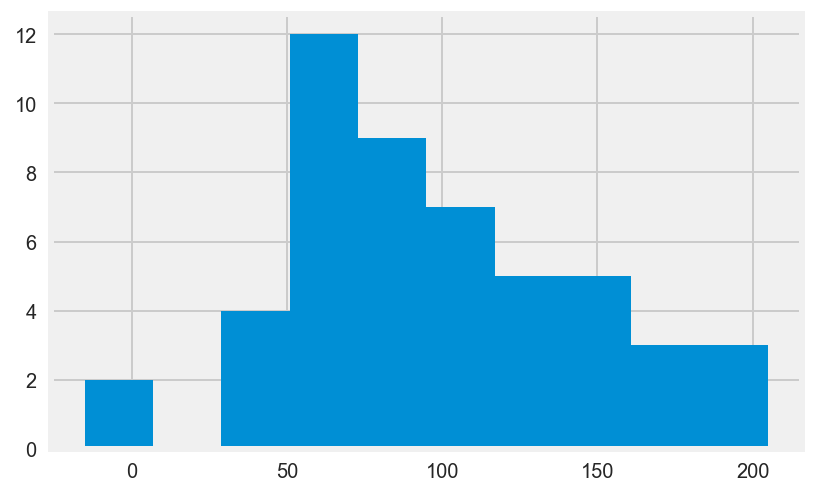

In [5]:
# seed the random number generator
np.random.seed(1)

# generate a univariate data sample mu=100, sigma (std) = 50
data = 50 * np.random.randn(50) + 100

print(data.mean(), data.std())

# histogram
plt.hist(data)

Running the example creates a histogram plot of the data showing no clear Gaussian distribution, not even Gaussian-like.

Increasing the size of the sample from 50 to 100 can help to better expose the Gaussian shape of the data distribution.

102.671844713 49.4204129641


(array([   7.,   18.,   39.,   83.,  118.,  106.,   81.,   29.,   16.,    3.]),
 array([ -39.65425001,  -10.53453944,   18.58517112,   47.70488168,
          76.82459224,  105.94430281,  135.06401337,  164.18372393,
         193.30343449,  222.42314506,  251.54285562]),
 <a list of 10 Patch objects>)

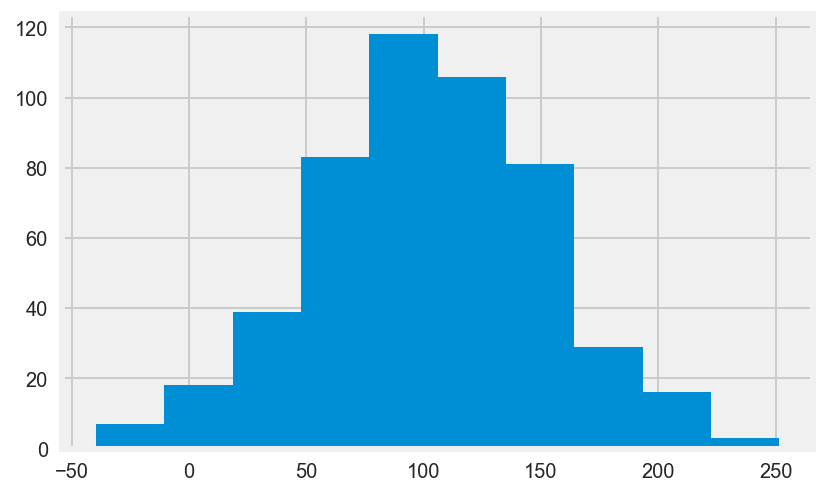

In [6]:
# seed the random number generator
np.random.seed(1)

# generate a univariate data sample mu=100, sigma (std) = 50
data = 50 * np.random.randn(500) + 100

print(data.mean(), data.std())

# histogram
plt.hist(data)

# Data Resolution
Perhaps you expect a Gaussian distribution from the data, but no matter the size of the sample that you collect, it does not materialize.

A common reason for this is the resolution that you are using to collect the observations. The distribution of the data may be obscured by the chosen resolution of the data or the fidelity of the observations. There may be many reasons why the resolution of the data is being modified prior to modeling, such as:

The configuration of the mechanism making the observation.
The data is passing through a quality-control process.
The resolution of the database used to store the data.
To make this concrete, we can make a sample of 100 random Gaussian numbers with a mean of 0 and a standard deviation of 1 and remove all of the decimal places.

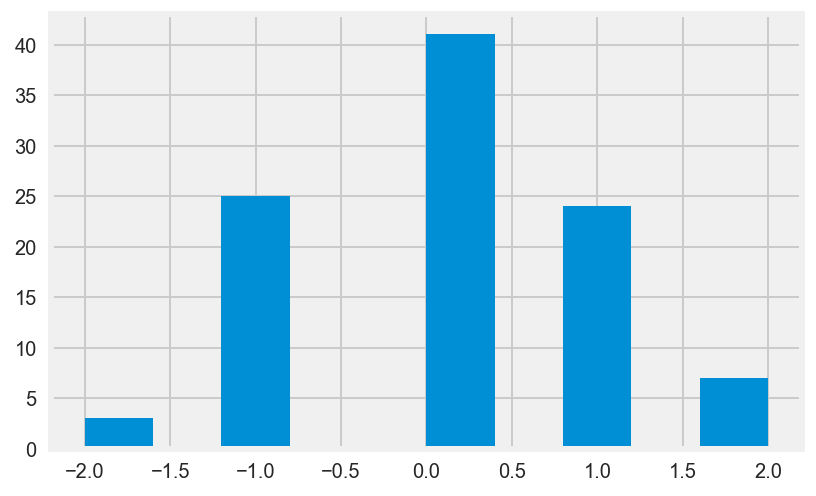

In [7]:
# seed the random number generator
np.random.seed(1)

# generate a univariate data sample
data = np.random.randn(100)

# remove decimal component
data = data.round(0)

# histogram
plt.hist(data)
plt.show()

Running the example results in a distribution that appears discrete although Gaussian-like. Adding the resolution back to the observations would result in a fuller distribution of the data.

# Extreme Values
A data sample may have a Gaussian distribution, but may be distorted for a number of reasons.

A common reason is the presence of extreme values at the edge of the distribution. Extreme values could be present for a number of reasons, such as:

Measurement error.
Missing data.
Data corruption.
Rare events.
In such cases, the extreme values could be identified and removed in order to make the distribution more Gaussian. These extreme values are often called outliers.

This may require domain expertise or consultation with a domain expert in order to both design the criteria for identifying outliers and then removing them from the data sample and all data samples that you or your model expect to work with in the future.

We can demonstrate how easy it is to have extreme values disrupt the distribution of data.

The example below creates a data sample with 100 random Gaussian numbers scaled to have a mean of 10 and a standard deviation of 5. An additional 10 zero-valued observations are then added to the distribution. This can happen if missing or corrupt values are assigned the value of zero. This is a common behavior in publicly available machine learning datasets; for example.

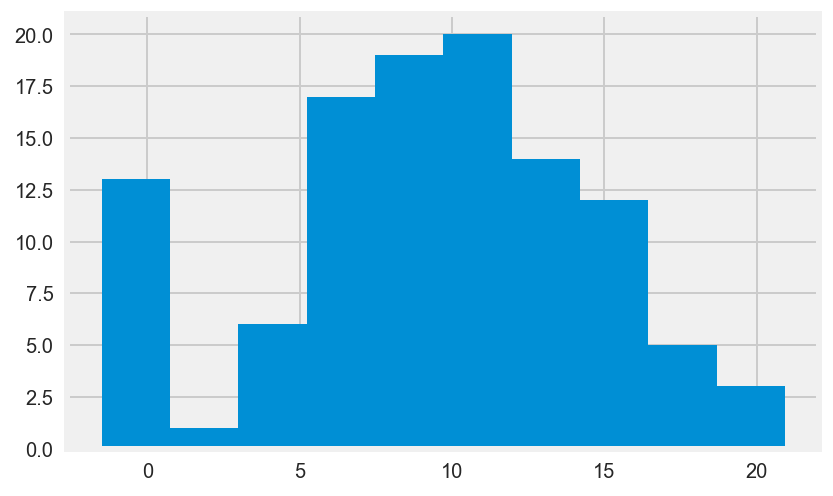

In [8]:
# seed the random number generator
np.random.seed(1)

# generate a univariate data sample
data = 5 * np.random.randn(100) + 10

# add extreme values
data = np.append(data, np.zeros(10))

# histogram
plt.hist(data)
plt.show()

Running the example creates and plots the data sample. You can clearly see how the unexpected high frequency of zero-valued observations disrupts the distribution.

# Long Tails
Extreme values can manifest in many ways. In addition to an abundance of rare events at the edge of the distribution, you may see a long tail on the distribution in one or both directions.

In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction.

You could use simple threshold values, perhaps based on the number of standard deviations from the mean, to identify and remove long tail values.

We can demonstrate this with a contrived example. The data sample contains 100 Gaussian random numbers with a mean of 10 and a standard deviation of 5. An additional 50 uniformly random values in the range 10-to-110 are added. This creates a long tail on the distribution.

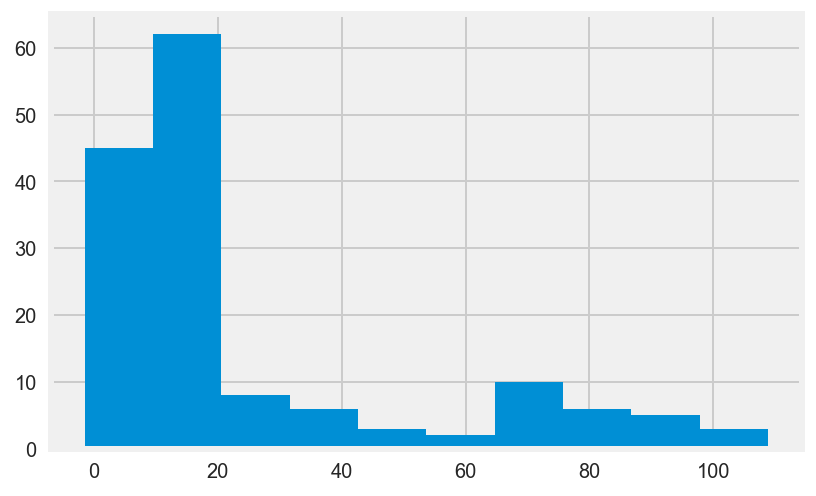

In [10]:
# seed the random number generator
np.random.seed(1)

# generate a univariate data sample
data = 5 * np.random.randn(100) + 10
tail = 10 + (np.random.rand(50) * 100)

# add long tail
data = np.append(data, tail)

# histogram
plt.hist(data)
plt.show()

Running the example you can see how the long tail distorts the Gaussian distribution and makes it look almost exponential or perhaps even bimodal (two bumps).


We can use a simple threshold, such as a value of 25, on this dataset as a cutoff and remove all observations higher than this threshold. We did choose this threshold with prior knowledge of how the data sample was contrived, but you can imagine testing different thresholds on your own dataset and evaluating their effect.

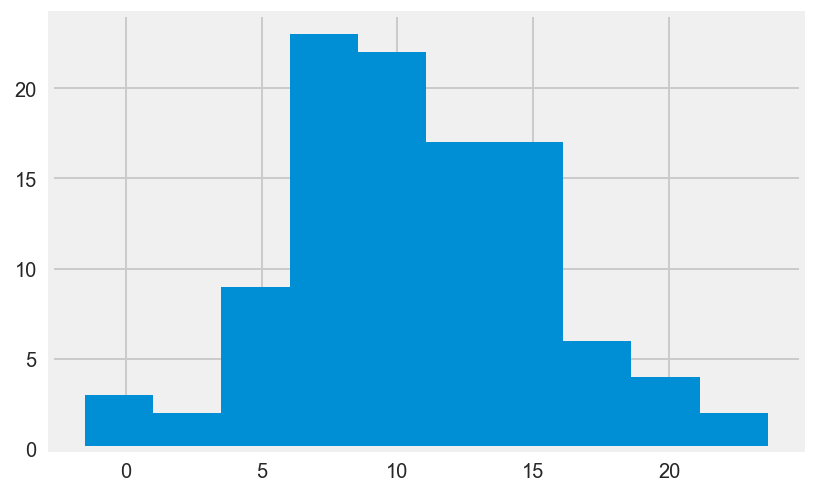

In [11]:
# seed the random number generator
np.random.seed(1)

# generate a univariate data sample
data = 5 * np.random.randn(100) + 10
tail = 10 + (np.random.rand(10) * 100)

# add long tail
data = np.append(data, tail)

# trim values
data = [x for x in data if x < 25]

# histogram
plt.hist(data)
plt.show()

# Power Transforms
The distribution of the data may be normal, but the data may require a transform in order to help expose it.

For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another. In some cases, this can be corrected by transforming the data via calculating the square root of the observations.

Alternately, the distribution may be exponential, but may look normal if the observations are transformed by taking the natural logarithm of the values. Data with this distribution is called log-normal.

To make this concrete, below is an example of a sample of Gaussian numbers transformed to have an exponential distribution.

Running the example creates a histogram showing the exponential distribution. It is not obvious that the data is in fact log-normal.

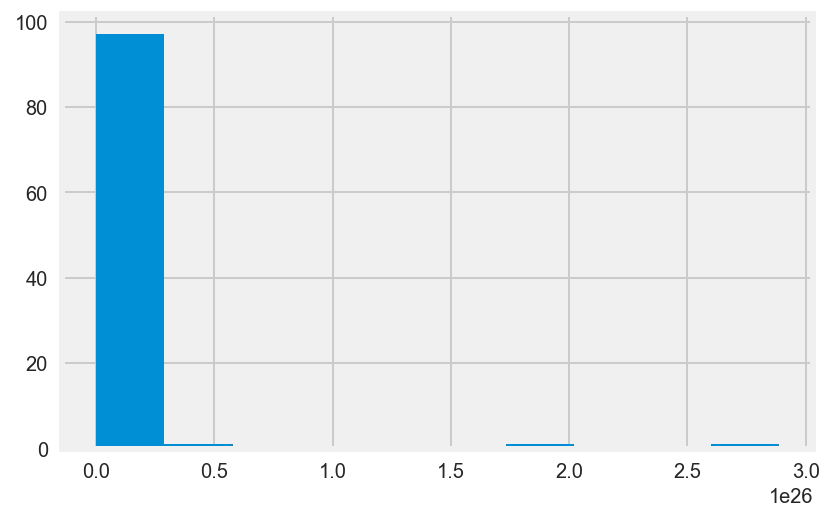

In [13]:
# seed the random number generator
np.random.seed(1)

# generate two sets of univariate observations
data = 5 * np.random.randn(100) + 50

# transform to be exponential
data = np.exp(data) # now log of data follows normal distribution, so data is lognormal.

# histogram
plt.hist(data)
plt.show()

Taking the square root and the logarithm of the observation in order to make the distribution normal belongs to a class of transforms called power transforms. The Box-Cox method is a data transform method that is able to perform a range of power transforms, including the log and the square root. The method is named for George Box and David Cox.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your data sample. The resulting data sample may be more linear and will better represent the underlying non-power distribution, including Gaussian.

The boxcox() SciPy function implements the Box-Cox method. It takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda:

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

For example, because we know that the data is lognormal, we can use the Box-Cox to perform the log transform by setting lambda explicitly to 0.

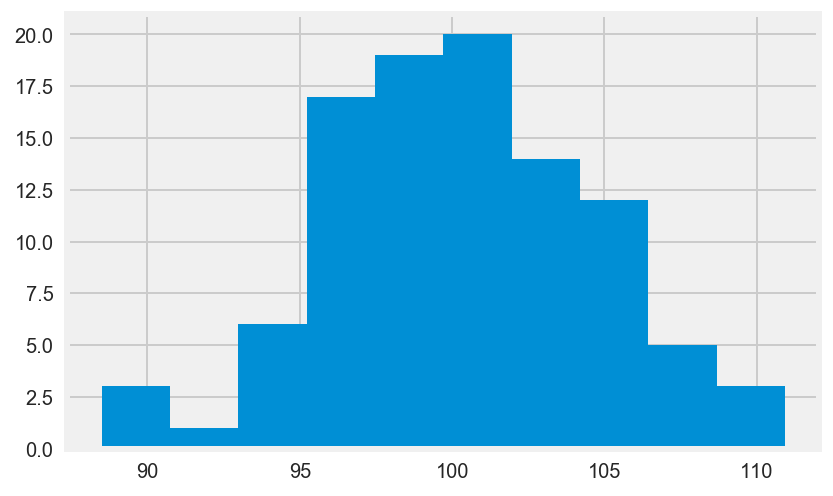

In [14]:
# seed the random number generator
np.random.seed(1)

# generate two sets of univariate observations
data = 5 * np.random.randn(100) + 100

# transform to be exponential
data = np.exp(data)

# power transform
data = stats.boxcox(data, 0)

# histogram
plt.hist(data)
plt.show()

A limitation of the Box-Cox transform is that it assumes that all values in the data sample are positive.

An alternative method that does not make this assumption is the Yeo-Johnson transformation.

# Use Anyway
Finally, you may wish to treat the data as Gaussian anyway, especially if the data is already Gaussian-like.

In some cases, such as the use of parametric statistical methods, this may lead to optimistic findings.

In other cases, such as machine learning methods that make Gaussian expectations on input data, you may still see good results.

This is a choice you can make, as long as you are aware of the possible downsides.

# Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.

List 3 possible additional ways that a Gaussian distribution may have been distorted
Develop a data sample and experiment with the 5 common values for lambda in the Box-Cox transform.
Load a machine learning dataset where at least one variable has a Gaussian-like distribution and experiment.
If you explore any of these extensions, I’d love to know.

# Summary
In this tutorial, you discovered the reasons why a Gaussian-like distribution may be distorted and techniques that you can use to make a data sample more normal.

Specifically, you learned:

- How to consider the size of the sample and whether the law of large numbers may help improve the distribution of a sample.
- How to identify and remove extreme values and long tails from a distribution.
- Power transforms and the Box-Cox transform that can be used to control for quadratic or exponential distributions.
